In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=500, n_features=1, bias=4.2,noise=5.1)
print (X.shape, y.shape)

(500, 1) (500,)


In [3]:
split = int(0.8*X.shape[0])
print (split)

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print (X_train.shape)
print (X_test.shape)

print (y_test.shape)

400
(400, 1)
(100, 1)
(100,)


In [12]:
## Methods we need to write
def hypothesis(x,w):
    x0 = 1
    return w[0]*x0 + x*w[1]

def get_error(x,w, y_true):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        err += (y_true[ix] - hypothesis(x[ix], w))**2   #MSE Error
        
    err = err/2*m
    return err
#Search Algorithm
#Linear Search
#Binary Search
#Random Search
#Hill clibing Searching


In [13]:
#Mini Batch Gradient Descent

def get_batch_grad(x,w,y_true):
    grad_0=0.0
    grad_1=0.0
    
    m=x.shape[0]
    k=np.random.choice(m)
    for ix in range(0,k):
        grad_0 += (y_true[ix] - hypothesis(x[ix] , w ))*(-1)
        grad_1 += (y_true[ix] - hypothesis(x[ix] , w ))*(-1*x[ix])
        
    grad_0=grad_0/m
    grad_1=grad_1/m
    return [grad_0,grad_1]

In [14]:
def get_grad(x,w,y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_0 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_1 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
        
    grad_0 = grad_0/m
    grad_1 = grad_1/m
    
    return [grad_0, grad_1]

def get_stochastic_grad(x_sample,w,y_true):
    
    grad_0 = 0.0
    grad_1 = 0.0
    
    grad_0 = (y_true - hypothesis(x_sample, w))*(-1)
    grad_1 = (y_true - hypothesis(x_sample, w))*(-1*x_sample)
    
    return [grad_0, grad_1]

In [15]:
def gradient_descent(x,w,y_true, learning_rate=0.1):
    error = get_error(x,w, y_true)
    
    [grad_0, grad_1] = get_grad(x, w, y_true)
    
    w[0] = w[0] - learning_rate*grad_0
    w[1] = w[1] - learning_rate*grad_1
    
    return error, w

In [16]:
def stochastic_gradient_descent(x, w, y_true, learning_rate=0.1):
    error = get_error(x, w, y_true)
    
    for ix in range(x.shape[0]):
        [grad_0, grad_1] = get_stochastic_grad(x[ix], w, y_true[ix])
        
        w[0] = w[0] - learning_rate*grad_0
        w[1] = w[1] - learning_rate*grad_1
    
    return error, w

[ 3.16960175 43.94368342]


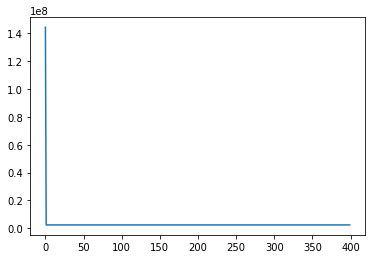

[2470573.34077764]


In [17]:
W=np.array([0.1,0.1])
loss=[]
for ix in range(400):
    er,w=stochastic_gradient_descent(X_train,W,y_train,learning_rate=0.1)
    loss.append(er)
print(W)

plt.plot(loss)
plt.show()
print(loss[-1])

In [18]:
def batch_gradient_descent(x,w,y_true,learning_rate=0.1):
    error=get_error(x,w,y_true)
    
    [grad_0,grad_1]=get_batch_grad(x,w,y_true)
    
    w[0] = w[0] - learning_rate * grad_0
    w[1] = w[1] - learning_rate * grad_1
    
    return error,w

In [19]:
W = np.array([0.1, 0.1])
loss = []

In [20]:
for ix in range(400):
    er, W = gradient_descent(X_train, W, y_train, learning_rate=0.01)
    loss.append(er)
    
    
print( W)

[ 3.9970249  41.37397838]


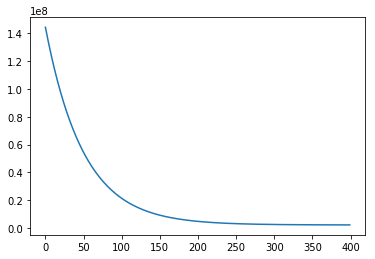

[2189267.45326516]


In [21]:
plt.plot(loss)
plt.show()

print (loss[-1])

[ 3.98854862 25.50284123]


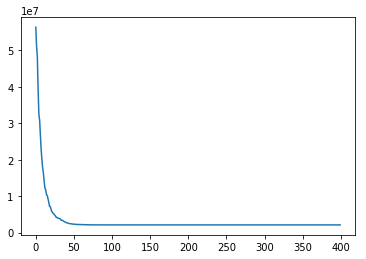

[2101791.55438518]


In [80]:
W = np.array([0.1, 0.1])
loss = []
for ix in range(400):
    er,W=batch_gradient_descent(X_train,W,y_train,learning_rate=0.1)
    loss.append(er)
    
print(W)
plt.plot(loss)
plt.show()
print(loss[-1])

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr.score(X_test, y_test)

0.9977589007492772

In [32]:
lr.predict(X_test)

array([-7.96959651e+01,  2.24876931e+02, -1.24139664e+02, -1.08910450e+02,
       -5.52977130e+01,  2.76570749e+01,  5.29398173e+01,  6.21309385e+01,
       -3.72251665e+01, -1.05736842e+02, -1.25110323e+02, -1.09466177e+02,
       -4.32761942e+00, -6.57905569e+01, -6.74689951e+01, -1.45135735e+02,
        6.80139764e+01, -4.65264462e+00,  4.25029298e+01,  9.31634582e+01,
       -2.13449505e+01,  9.22029605e+01,  1.22542533e+02, -8.86024133e+01,
       -7.45854235e+01,  5.49997249e+01, -1.29994127e+02, -2.84784629e+02,
        1.36922009e+02, -2.25050093e+01,  1.86637914e-01, -1.49430100e+02,
        1.25256606e+01, -7.23573032e+01,  7.73560374e+01,  1.09923899e+02,
       -7.85961713e+00,  1.52162863e+01,  6.80644818e+01,  8.15335671e+01,
       -3.06165923e+01,  6.73777879e+01,  5.13848230e+01,  1.97949880e+02,
        5.82472882e+00,  2.58838424e+01, -8.78072461e+01,  3.33445263e+01,
       -4.34088541e+01,  1.49584627e+02, -1.87133569e+02,  1.10888464e+01,
        5.65218492e+01,  